In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive


/content/drive/My Drive


In [ ]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [ ]:
df = pd.read_csv('housing.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV',axis=1), df['MEDV'], test_size=0.2, random_state=42)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [ ]:
scaler = MinMaxScaler()

In [ ]:
pd.DataFrame(scaler.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


# Собираем нейронную сеть

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

# про функции активации нейронов:
# https://ru.wikipedia.org/wiki/Функция_активации


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,665
Trainable params: 4,665
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

In [ ]:
early_stopping_monitor = EarlyStopping(patience=3)

In [ ]:
history = model.fit(scaler.fit_transform(X_train),
                    y_train,
                    epochs = 300,
                    validation_split=0.2,
                    callbacks=[early_stopping_monitor])

Epoch 1/300
11/11 [==============================] - 1s 21ms/step - loss: 22.5150 - mse: 598.8438 - val_loss: 21.3656 - val_mse: 526.8804
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 21.9036 - mse: 572.2276 - val_loss: 20.6330 - val_mse: 496.8829
Epoch 3/300
11/11 [==============================] - 0s 4ms/step - loss: 21.0061 - mse: 535.3366 - val_loss: 19.4692 - val_mse: 451.5150
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 19.5676 - mse: 479.2826 - val_loss: 17.5865 - val_mse: 384.0854
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 17.3353 - mse: 401.2804 - val_loss: 14.8376 - val_mse: 294.8930
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: 14.3407 - mse: 302.6695 - val_loss: 11.2784 - val_mse: 198.3019
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 11.4513 - mse: 209.3337 - val_loss: 8.6936 - val_mse: 127.9052
Epoch 8/300
11/11 [======================

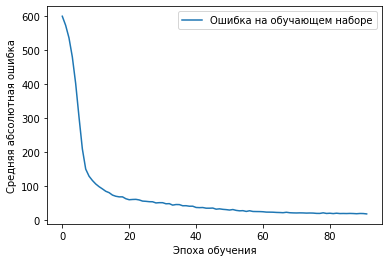

In [ ]:
plt.plot(history.history['mse'], 
         label='Ошибка на обучающем наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(scaler.fit_transform(X_test))

In [ ]:
print(np.sqrt(mean_squared_error(y_test, pred)))

5.159051280371816


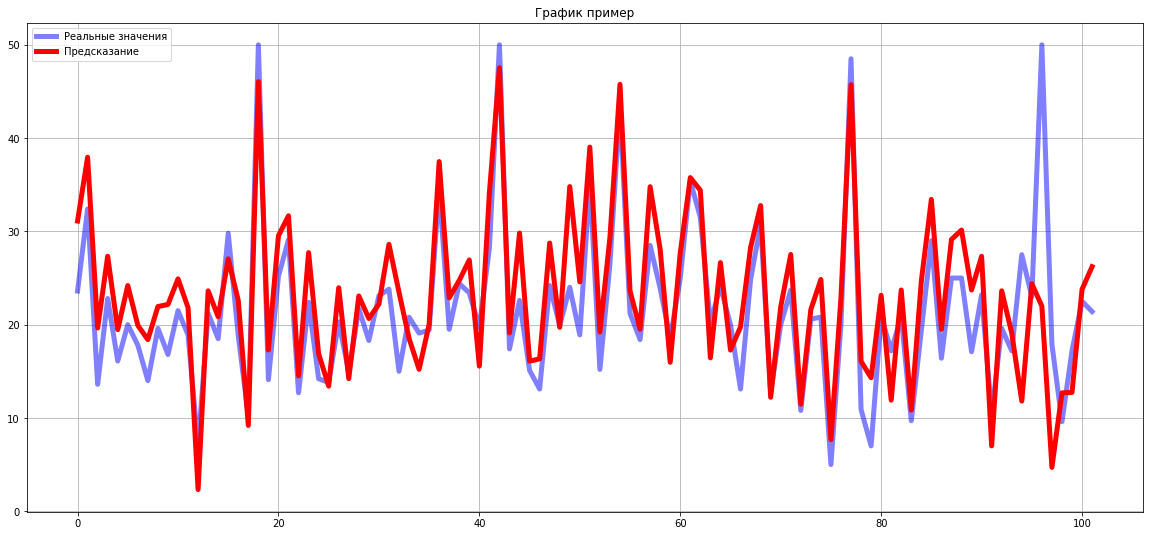

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения', alpha = 0.5)
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("График пример")
plt.grid(True)
plt.show()